# Car Price Prediction Multiple Linear Regression

Problem in <a href='https://www.kaggle.com/datasets/hellbuoy/car-price-prediction'>Kaggle</a>

## Declaração do problema
A empresa automobilística chinesa Geely Auto aspira entrar no mercado dos EUA estabelecendo sua unidade de fabricação lá e produzindo carros localmente para competir com seus colegas americanos e europeus.

Eles contrataram uma empresa de consultoria automobilística para entender os fatores dos quais depende o preço dos carros. Especificamente, eles querem entender os fatores que afetam os preços dos carros no mercado americano, pois podem ser muito diferentes do mercado chinês. A empresa quer saber:

Quais variáveis ​​são significativas na previsão do preço de um carro
Como essas variáveis ​​descrevem o preço de um carro
Com base em várias pesquisas de mercado, a empresa de consultoria reuniu um grande conjunto de dados de diferentes tipos de carros no mercado americano.

## Objetivo de Negócios
Somos obrigados a modelar o preço dos carros com as variáveis ​​independentes disponíveis. Ele será usado pela administração para entender exatamente como os preços variam com as variáveis ​​independentes. Eles podem manipular o design dos carros, a estratégia de negócios etc. para atender a determinados níveis de preços. Além disso, o modelo será uma boa maneira de a administração entender a dinâmica de preços de um novo mercado.

## Dicionário de dados
Coluna|Descrição
-----|-----
Car_ID	|Sua classificação de risco de seguro atribuída, um valor de +3 indica que o automóvel é arriscado, -3 que provavelmente é bastante seguro. (Categórico)
carCompany |	Nome da empresa de carros (categórica)
fueltype |	Tipo de combustível de carro, ou seja, gás ou diesel (categórico)
aspiration | 	Aspiração usada em um carro (categórico)
doornumber |	Número de portas em um carro (categórico)
carbody |	Corpo de carro (categórico)
drivewheel |	tipo de roda de acionamento (categórica)
enginelocation |	Localização do motor do carro (categórico)
wheelbase |	Weelbase de carro (numérico)
carlength |	Comprimento do carro (numérico)
carwidth |	Largura do carro (numérico)
carheight |	Altura do carro (numérico)
curbweight |	O peso de um carro sem ocupantes ou bagagem. (Numérico)
enginetype |	Tipo de motor. (Categórico)
cylindernumber |	Cilindro colocado no carro (categórico)
enginesize |	Tamanho do carro (numérico)
fuelsystem |	Sistema de combustível de carro (categórico)
boreratio |	Boreratio de carro (numérico)
stroke |	AVC ou volume dentro do motor (numérico)
compressionratio |	Taxa de compressão de carro (numérico)
horsepower |	Potência (numérica)
peakrpm |	RPM de pico de carro (numérico)
citympg |	Milhagem na cidade (numérica)
highwaympg |	Milhagem na rodovia (numérica)
price(Dependent variable) |	Preço do carro (numérico)

## 1. Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Warnings remove 
import warnings
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_csv('dados/CarPrice_Assignment.csv')

In [3]:
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dados.shape

(205, 26)

## 1.2 Análises Preliminares

In [5]:
#Estatística descritiva
dados.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [6]:
dados.corr().round(2).loc['price']

car_ID             -0.11
symboling          -0.08
wheelbase           0.58
carlength           0.68
carwidth            0.76
carheight           0.12
curbweight          0.84
enginesize          0.87
boreratio           0.55
stroke              0.08
compressionratio    0.07
horsepower          0.81
peakrpm            -0.09
citympg            -0.69
highwaympg         -0.70
price               1.00
Name: price, dtype: float64

In [7]:
# Checando dados nulos
dados.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# 2.1 Comportamento da Variável Dependente (Y)

In [8]:
# configuração de grafico

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid')

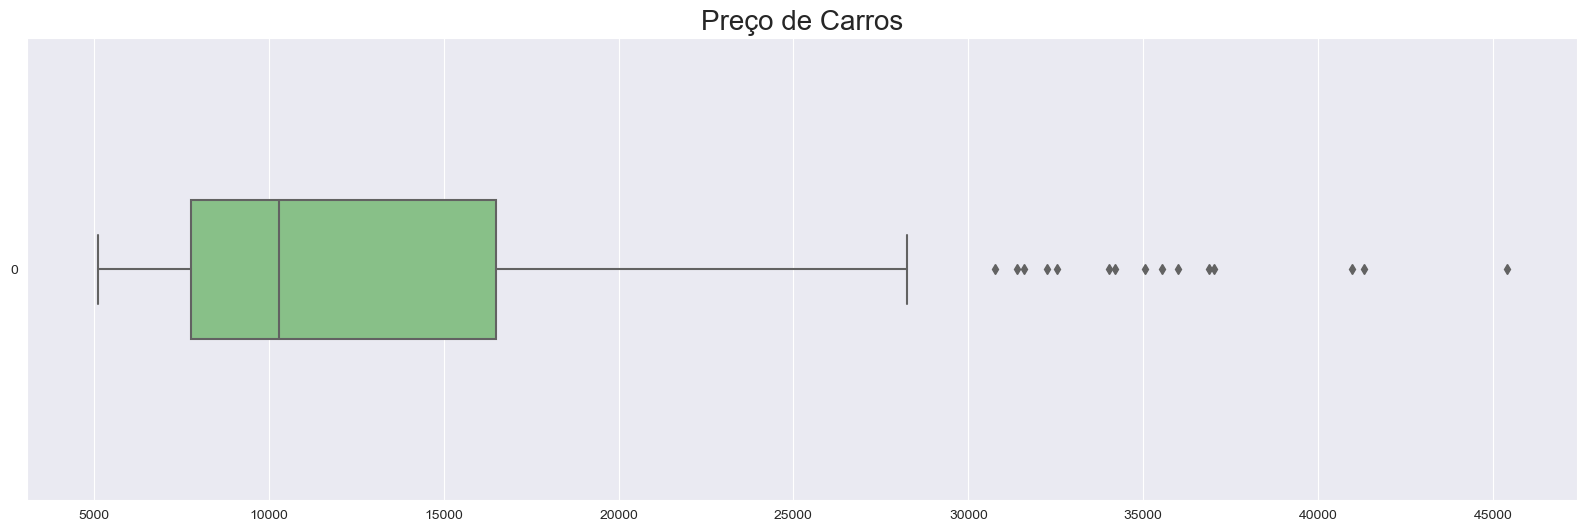

In [9]:
ax = sns.boxplot(dados['price'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço de Carros', fontsize=20)
ax.set_xlabel('', fontsize=16)
ax;

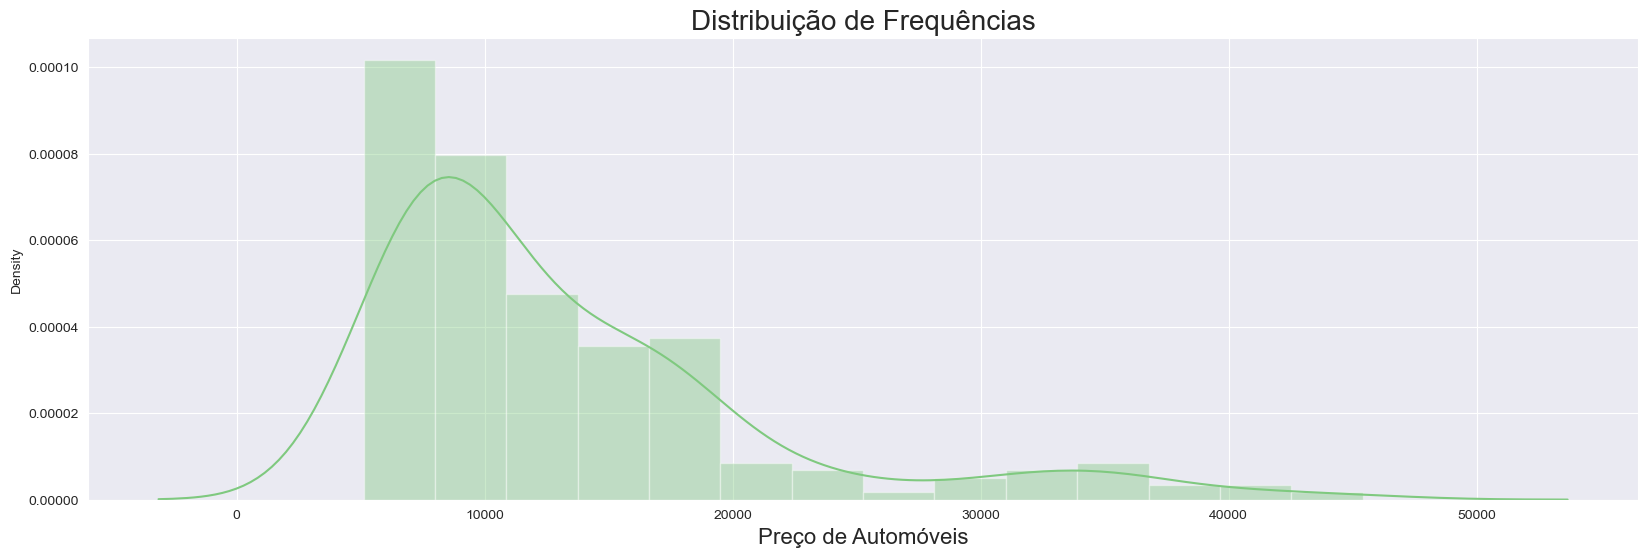

In [10]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço de Automóveis', fontsize=16)
ax;

<b>Possível notar assimetria a direita, para melhorar o modelo o ideal é o comportamento ser semelhante a uma distribuição normal.</b>

# 3.1 Tratando a variável dependente (Y)

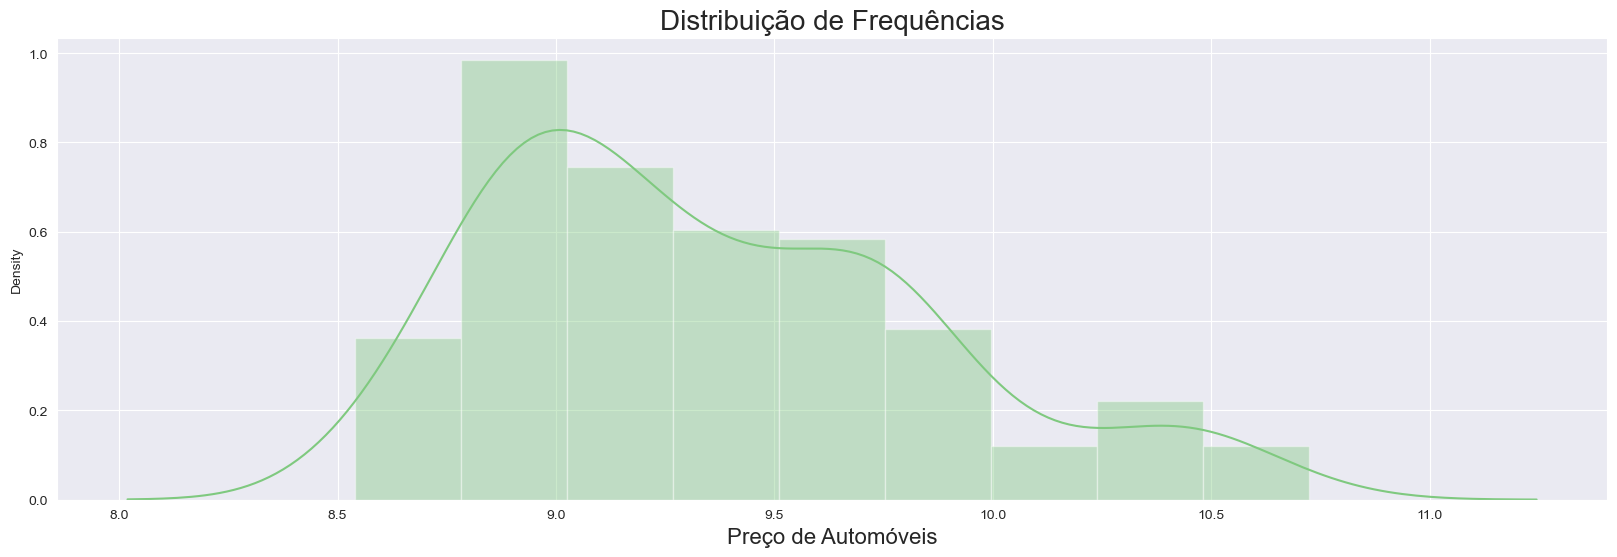

In [11]:
y = np.log(dados['price'])

ax = sns.distplot(y)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço de Automóveis', fontsize=16)
ax;

## 3.2 Tratando a variáveis explicativas (X)

In [12]:
columns = [ 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [13]:
X = dados[columns]
X.set_index(dados['car_ID'], inplace=True)

In [14]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [15]:
X.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

## Convertendo as variáveis alfanuméricas para numéricas

In [ ]:
# Label Encoder

columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
           'enginetype','cylindernumber','fuelsystem',]

label_encoder = LabelEncoder()

for column in columns:
    X[column] = label_encoder.fit_transform(X[column])

In [ ]:
X.head(3)

In [ ]:
X.dtypes

## Tratando a variável symboling
<p>A variável symboling nos diz sobre a segurança de um automóvel que pode variar de -3 a 3, entretanto esses valores negativos podem atrapalhar a construção do modelo, portanto irei alterá-la para variar de 0 a 6.</p>

In [ ]:
X['symboling'] = X['symboling'].astype(str)
X['symboling'] = X['symboling'].str.replace('-3','0')
X['symboling'] = X['symboling'].str.replace('-2','1')
X['symboling'] = X['symboling'].str.replace('-1','2')
X['symboling'] = X['symboling'].str.replace('0','3')
X['symboling'] = X['symboling'].str.replace('1','4')
X['symboling'] = X['symboling'].str.replace('2','5')
X['symboling'] = X['symboling'].str.replace('3','6')
X['symboling'] = X['symboling'].astype(int)

## Calculando o Logaritmo das variáveis explicativas (X)

In [ ]:
for column_name in X.columns:
    column = X[column_name]
    if ((column == 0).sum()) >0:
        X[column_name] = np.log(X[column_name]+1)
    else:
        X[column_name] = np.log(X[column_name])

## Identificando as variáveis explicativas com correlação maior ou igual a 0.3

In [ ]:
X2 = X.copy()

In [ ]:
X2['price'] = y

In [ ]:
columns = X2.corr().round(2).loc['price'].index
values = X2.corr().round(2).loc['price'].values

correlacao = pd.DataFrame(values, columns, columns=['Correlação'])
correlacao=correlacao[correlacao['Correlação']>=0.3]

Aqui escolhir uma correlação de >=0.3 para entrar no modelo, assim encontrando 11 variáveis com maior importancia para explicar os valores

In [ ]:
ax = sns.pairplot(X2, y_vars='price',x_vars = ['symboling','drivewheel','wheelbase'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

ax = sns.pairplot(X2, y_vars='price',x_vars = ['carlength','carwidth','carheight'], height=5, kind='reg')
ax

ax = sns.pairplot(X2, y_vars='price',x_vars = ['curbweight','enginesize','fuelsystem'], height=5, kind='reg')
ax

ax = sns.pairplot(X2, y_vars='price',x_vars = ['boreratio','horsepower'], height=5, kind='reg')
ax

## 4.1 Criando os Datasets de Treino e Teste

In [ ]:
columns=correlacao.index[:-1]
X = X[columns]
X.head()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5.1 Estimando o modelo

Estimando o modelo com statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
# Como o y_train esta na matriz 2d eu converto para 1d com y_train.values.ravel()

modelo_statsmodels = sm.OLS(y_train.values.ravel(), X_train_com_constante, hasconst=True).fit()

In [ ]:
print(modelo_statsmodels.summary())

<h5>Olhando para o indicador P>|t| decido considerar apenas as variáveis que tiverem valor abaixo de 0.5, o que me faz tirar do modelo as variáveis<b> 'carlength' e 'fuelsystem'</b></h5>

In [ ]:
X_train.drop(columns=['carlength', 'fuelsystem'], inplace=True)
X_test.drop(columns=['carlength', 'fuelsystem'], inplace=True)

## 6.1 Criando modelo de Regressão Linear Multipla

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

In [ ]:
modelo.score(X_train, y_train).round(3)

In [ ]:
y_predict_train = modelo.predict(X_train)
df = pd.DataFrame({'treino':np.exp(y_train),'modelo':np.exp(y_predict_train)})

ax = sns.lmplot(x='treino', y='modelo', data=df)
ax.fig.suptitle('Dispersão entre valores de treino e valor estimado pelo modelo', fontsize=20, y=1.1)
ax.set_axis_labels("Modelo", 'Treino', fontsize =14)
ax;

## 6.2 validando com a base teste

In [ ]:
y_predict = modelo.predict(X_test)
metrics.r2_score(y_test, y_predict).round(3)

Validando com a base de teste obtivemos um R² de 0.826

In [ ]:
df = pd.DataFrame({'teste':np.exp(y_test),'real':np.exp(y_predict)})

Lembrando que para fazer a conversão dos valores logarítmicos devemos calcular o exponencial

In [ ]:
ax = sns.lmplot(x='teste', y='real', data=df)
ax.fig.suptitle('Dispersão Entre Valores Reais e Estimados', fontsize=20, y=1.1)
ax.set_axis_labels("Estimado", 'Real', fontsize =14)
ax;

# 7.1 Conclusão

Por fim com esse estudo podemos concluir que as principais variáveis que para precificação de automóveis no mercado americano são:

-   **symboling** → Classificação De segurança de um automóvel.
-   **drivewheel** → Tipo de roda de acionamento.
-   **wheelbase** → Distância entre os eixos do automóvel
-   **carwidth** → Largura do automóvel.
-   **curbweight** → Peso do automóvel (sem ocupantes e bagagem)
-   **enginesize** →Tamanho do motor
-   **boreratio** → relação entre as dimensões do diâmetro do furo do cilindro do motor e o comprimento do curso do pistão.
-   **horsepower** → Cavalos de potência.

Com base nessas variáveis escolhidas por possuírem uma correlação alta com o preço conseguimos entrar um **R² de 0.826**, contudo é importante ressaltar que não obtivemos bons resultado com veículos mais caros (veículos de luxo), é que para esse tipo de veículo o que as variáveis podem ser relevantes para sua precificação podem ser diferentes, assim sendo necessário um novo estudo para esta classe de veículos.

## 8.1 Bonus

### Contruindo uma classe para o modelo e salvando

In [ ]:
import pickle

In [ ]:
# Depara dos valores

valores_convertidos = list(np.exp(X['drivewheel'].unique()).round(0))
valores_originais = list(dados['drivewheel'].unique())

depara_drivewheel = {valores_originais[elemento]: valores_convertidos[elemento] for elemento in range(len(valores_originais))}
depara_symboling = {-3:0,-2:1,-1:2,0:3,1:4,2:5,3:6}
deparas = [depara_drivewheel, depara_symboling]

In [ ]:
class Modelo:
    def __init__(self, modelo, deparas):
        self.modelo = modelo
        self.depara_drivewheel = deparas[0]
        self.depara_symboling = deparas[1]

    def predict(self, entrada):
        entrada2 = entrada.copy()
        
        entrada2['symboling'] = np.log(self.depara_symboling[entrada['symboling']])
        entrada2['drivewheel'] = np.log(self.depara_drivewheel[entrada['drivewheel']])
        entrada2['wheelbase'] = np.log(entrada['wheelbase'])
        entrada2['carwidth'] = np.log(entrada['carwidth'])
        entrada2['curbweight'] = np.log(entrada['curbweight'])
        entrada2['enginesize'] = np.log(entrada['enginesize'])
        entrada2['boreratio'] = np.log(entrada['boreratio'])
        entrada2['horsepower'] = np.log(entrada['horsepower'])
        estimativa = np.exp(self.modelo.predict([entrada2])[0]).round(2)
        
        entrada['price_p'] = estimativa # importante se atentar que o métado adiciona uma chave a variavel entrada
        return entrada # retorno nem se faz necessário, esta aqui apenas para visualizar no notebook
        

        

In [ ]:
#Estanciando classe do modelo
modelo_cars = Modelo(modelo,deparas)

## Teste da classe

In [ ]:
entrada = dados[X_train.columns].iloc[3]
entrada

<i>Escolhi uma entrada aleatória para testar, a entrada para o método predict da classe Modelo deve conter este formato com essa variaveis.<i>

In [ ]:
modelo_cars.predict(entrada)

O retorno é às mesmas variáveis com o campo <b>'price_p'</b> contendo o valor estimado para o veículo com estas características.

## Salvando

In [ ]:
output = open('modelo_cars', 'wb')
pickle.dump(modelo_cars, output)
output.close()

## Carregando

In [ ]:
input_ = open('modelo_cars','rb')
load_modelo = pickle.load(input_)
input_.close()

In [ ]:
entrada = dados[X_train.columns].iloc[128]

load_modelo.predict(entrada)